# K-nearest neighbors: Movie recommendation system

In [34]:

# Handle imports up-front
import json
import pandas as pd

movies=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_movies.csv")
credits=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_credits.csv")

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [17]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [39]:
# Inspecting both datasets to find a common column for merging
print(movies.columns)
print(credits.columns)

# Assuming 'id' in movies corresponds to 'movie_id' in credits
combined_data = pd.merge(movies, credits, left_on='id', right_on='movie_id')

# Check the result
combined_data.info()

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 no

In [19]:
data_df.drop(['title_x', 'title_y'], axis=1, inplace=True)
data_df.rename({'original_title': 'title'}, axis=1, inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   title                 4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

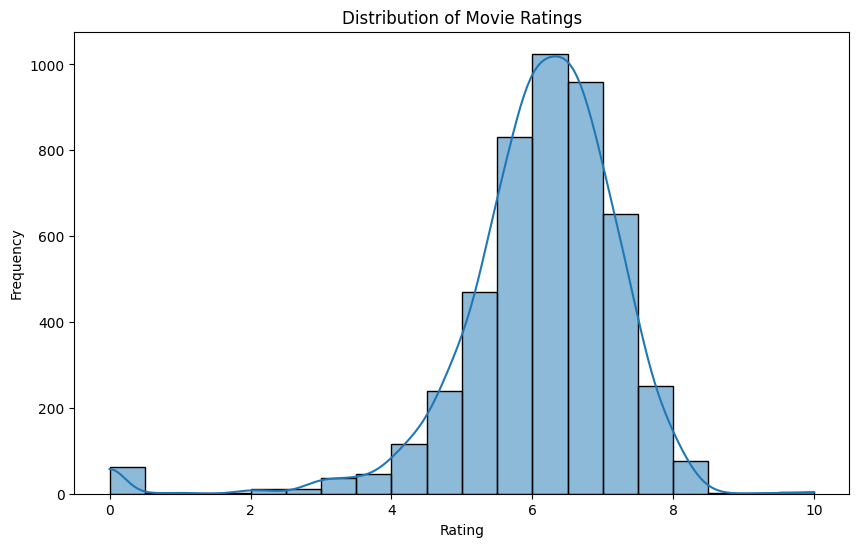

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data_df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_4473/2122638306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')


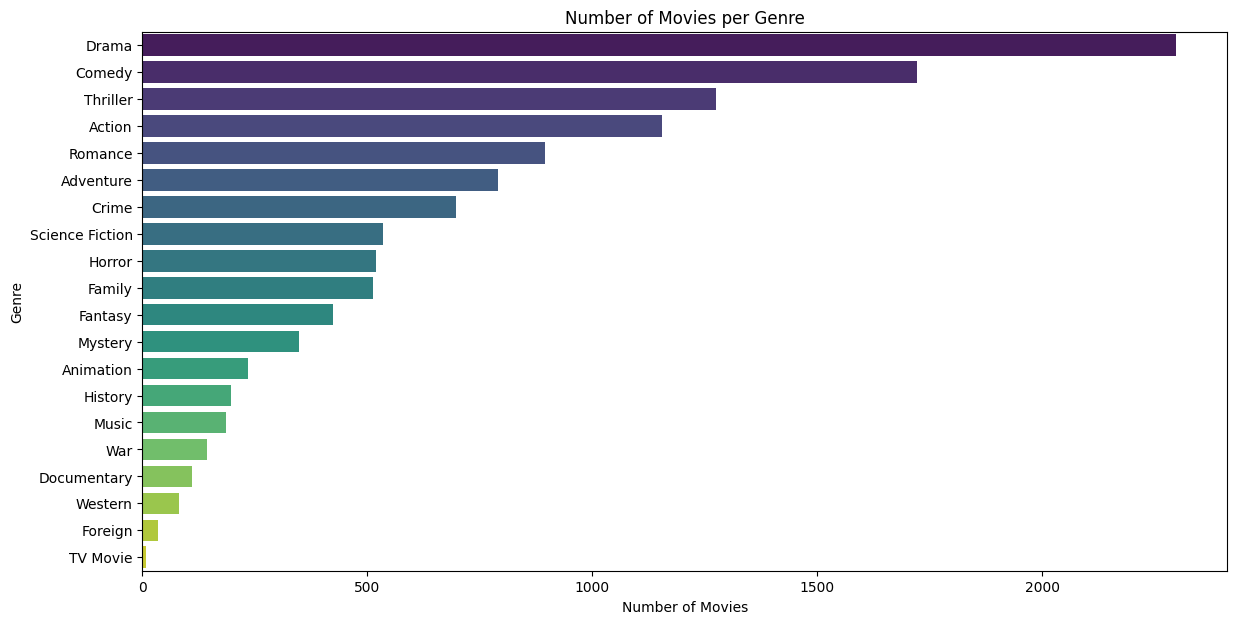

In [21]:
# Create a count plot for genres
data_df['genres'] = data_df['genres'].apply(lambda x: ','.join([i['name'] for i in eval(x)]))
genres_split = data_df['genres'].str.get_dummies(sep=',')
genres_count = genres_split.sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()



In [40]:
import json  # Ensure this is imported

# Make a copy to work with while encoding so that we have the original to go back to
# if needed
encoded_data_df = combined_data.copy()

# Process the 'cast' column
# Empty list to hold extracted values
extracted_values = []

# Loop on the elements of the cast column
for json_string in combined_data['cast']:

    # Load the JSON string into a Python dictionary
    if pd.notna(json_string):  # Check for non-null values
        json_list = json.loads(json_string)

        # Empty list to hold values from this element
        values = []

        # Loop on the first three elements of the JSON list
        for item in json_list[:3]:
            # Extract the value for the name key
            value = item['name']
            # Add it to the list
            values.append(value)

        extracted_values.append(values)
    else:
        extracted_values.append(None)  # Handle null values

# Replace the 'cast' column with the extracted values
encoded_data_df['cast'] = extracted_values

# Process the 'keywords' column
encoded_data_df['keywords'] = combined_data['keywords'].apply(
    lambda x: [item['name'] for item in json.loads(x)][:3] if pd.notna(x) else None
)

# Process the 'genres' column
encoded_data_df['genres'] = combined_data['genres'].apply(
    lambda x: [item['name'] for item in json.loads(x)][:3] if pd.notna(x) else None
)

# Display the first few rows
encoded_data_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [42]:
import json  # Ensure this is imported

# Function to parse JSON and extract 'name' values as a single concatenated string
def extract_names(json_string):
    if pd.notna(json_string):  # Check for non-null values
        json_list = json.loads(json_string)  # Parse JSON
        names = [item['name'] for item in json_list]  # Extract 'name' values
        return ' '.join(names)  # Concatenate names into a single string
    else:
        return ''  # Return empty string for null values

# Apply the function to the relevant columns
encoded_data_df['genres'] = combined_data['genres'].apply(extract_names)
encoded_data_df['keywords'] = combined_data['keywords'].apply(extract_names)
encoded_data_df['cast'] = combined_data['cast'].apply(extract_names)

# Display the processed data
encoded_data_df[['genres', 'keywords', 'cast']].head()

,genres,keywords,cast
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6 bri...,Daniel Craig Christoph Waltz Léa Seydoux Ralph...
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...


In [43]:
def concatenate_features(row):
    return ' '.join([
        row['genres'], 
        row['keywords'], 
        row['cast'], 
        str(row['overview']) if pd.notna(row['overview']) else ''
    ])

# Create a new column 'combined_features' with concatenated text
encoded_data_df['combined_features'] = encoded_data_df.apply(concatenate_features, axis=1)

# Preview the result
encoded_data_df[['genres', 'keywords', 'cast', 'overview', 'combined_features']].head()


,genres,keywords,cast,overview,combined_features
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6 bri...,Daniel Craig Christoph Waltz Léa Seydoux Ralph...,A cryptic message from Bond’s past sends him o...,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Following the death of District Attorney Harve...,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction based on nove...


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
feature_matrix = vectorizer.fit_transform(encoded_data_df['combined_features'])

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined_features column
feature_matrix = vectorizer.fit_transform(encoded_data_df['combined_features'])

# Check the shape of the resulting matrix
print("Feature matrix shape:", feature_matrix.shape)

Feature matrix shape: (4803, 53364)


In [46]:
# Initialize the Nearest Neighbors model
knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit the model on the feature matrix
knn.fit(feature_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [47]:
def recommend_movies(movie_title, num_recommendations=5):
    # Find the index of the movie
    movie_index = encoded_data_df[encoded_data_df['original_title'] == movie_title].index[0]
    
    # Get the feature vector for the query movie
    movie_vector = feature_matrix[movie_index]
    
    # Find distances and indices of neighbors
    distances, indices = knn.kneighbors(movie_vector, n_neighbors=num_recommendations + 1)
    
    # Retrieve movie titles and distances
    recommended_movies = []
    for i in range(1, len(indices[0])):  # Skip the first one as it's the query movie itself
        idx = indices[0][i]
        recommended_movies.append((encoded_data_df['original_title'].iloc[idx], distances[0][i]))
    
    return recommended_movies

In [48]:
combined_data = pd.merge(movies, credits, left_on='id', right_on='movie_id')

In [49]:
movie_to_search = "The Hangover"
recommendations = recommend_movies(movie_to_search, num_recommendations=5)

print(f"Movies similar to '{movie_to_search}':")
for title, distance in recommendations:
    print(f"{title} (Distance: {distance:.4f})")

Movies similar to 'The Hangover':
The Hangover Part II (Distance: 0.7763)
Last Vegas (Distance: 0.9009)
Very Bad Things (Distance: 0.9208)
Oz: The Great and Powerful (Distance: 0.9274)
Soul Men (Distance: 0.9306)


In [50]:
import pickle

# Save the KNN model
pickle.dump(knn, open("../models/knn_model.pkl", "wb"))

# Save the TF-IDF matrix
pickle.dump(feature_matrix, open("../data/tfidf_matrix.pkl", "wb"))

# Save the processed dataset
pickle.dump(encoded_data_df, open("../data/encoded_features_df.pkl", "wb"))

In [51]:
import os

# Create directories if they don't exist
os.makedirs("../models", exist_ok=True)
os.makedirs("../data", exist_ok=True)

In [52]:
# Load the KNN model
knn_model = pickle.load(open("../models/knn_model.pkl", "rb"))

# Load the TF-IDF matrix
tfidf_matrix = pickle.load(open("../data/tfidf_matrix.pkl", "rb"))

# Load the encoded dataset
encoded_features_df = pickle.load(open("../data/encoded_features_df.pkl", "rb"))